In this notebook, we are looking for the diagnosis of heart disease among patients using the [heart disease dataset](https://www.kaggle.com/johnsmith88/heart-disease-dataset). First, read the information about the different features, then answer the questions in each section using the attached data.

# Data

## Importing Libraries

In this notebook, you cannot use scikit learn and other libraries, except for those imported below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

Load dataset csv file into a data frame.

In [2]:
# TODO
df = pd.read_csv('./heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df['target'] = df['target'].replace(0, -1)

## EDA

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. In this section, you should analyze the data. You can use the functions provided by the Pandas library. You can use analysis such as null checking of features, number of features and samples, and type of features. But don't stop there and search for it.


In [5]:
# TODO
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.026341
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,1.000141
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,-1.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

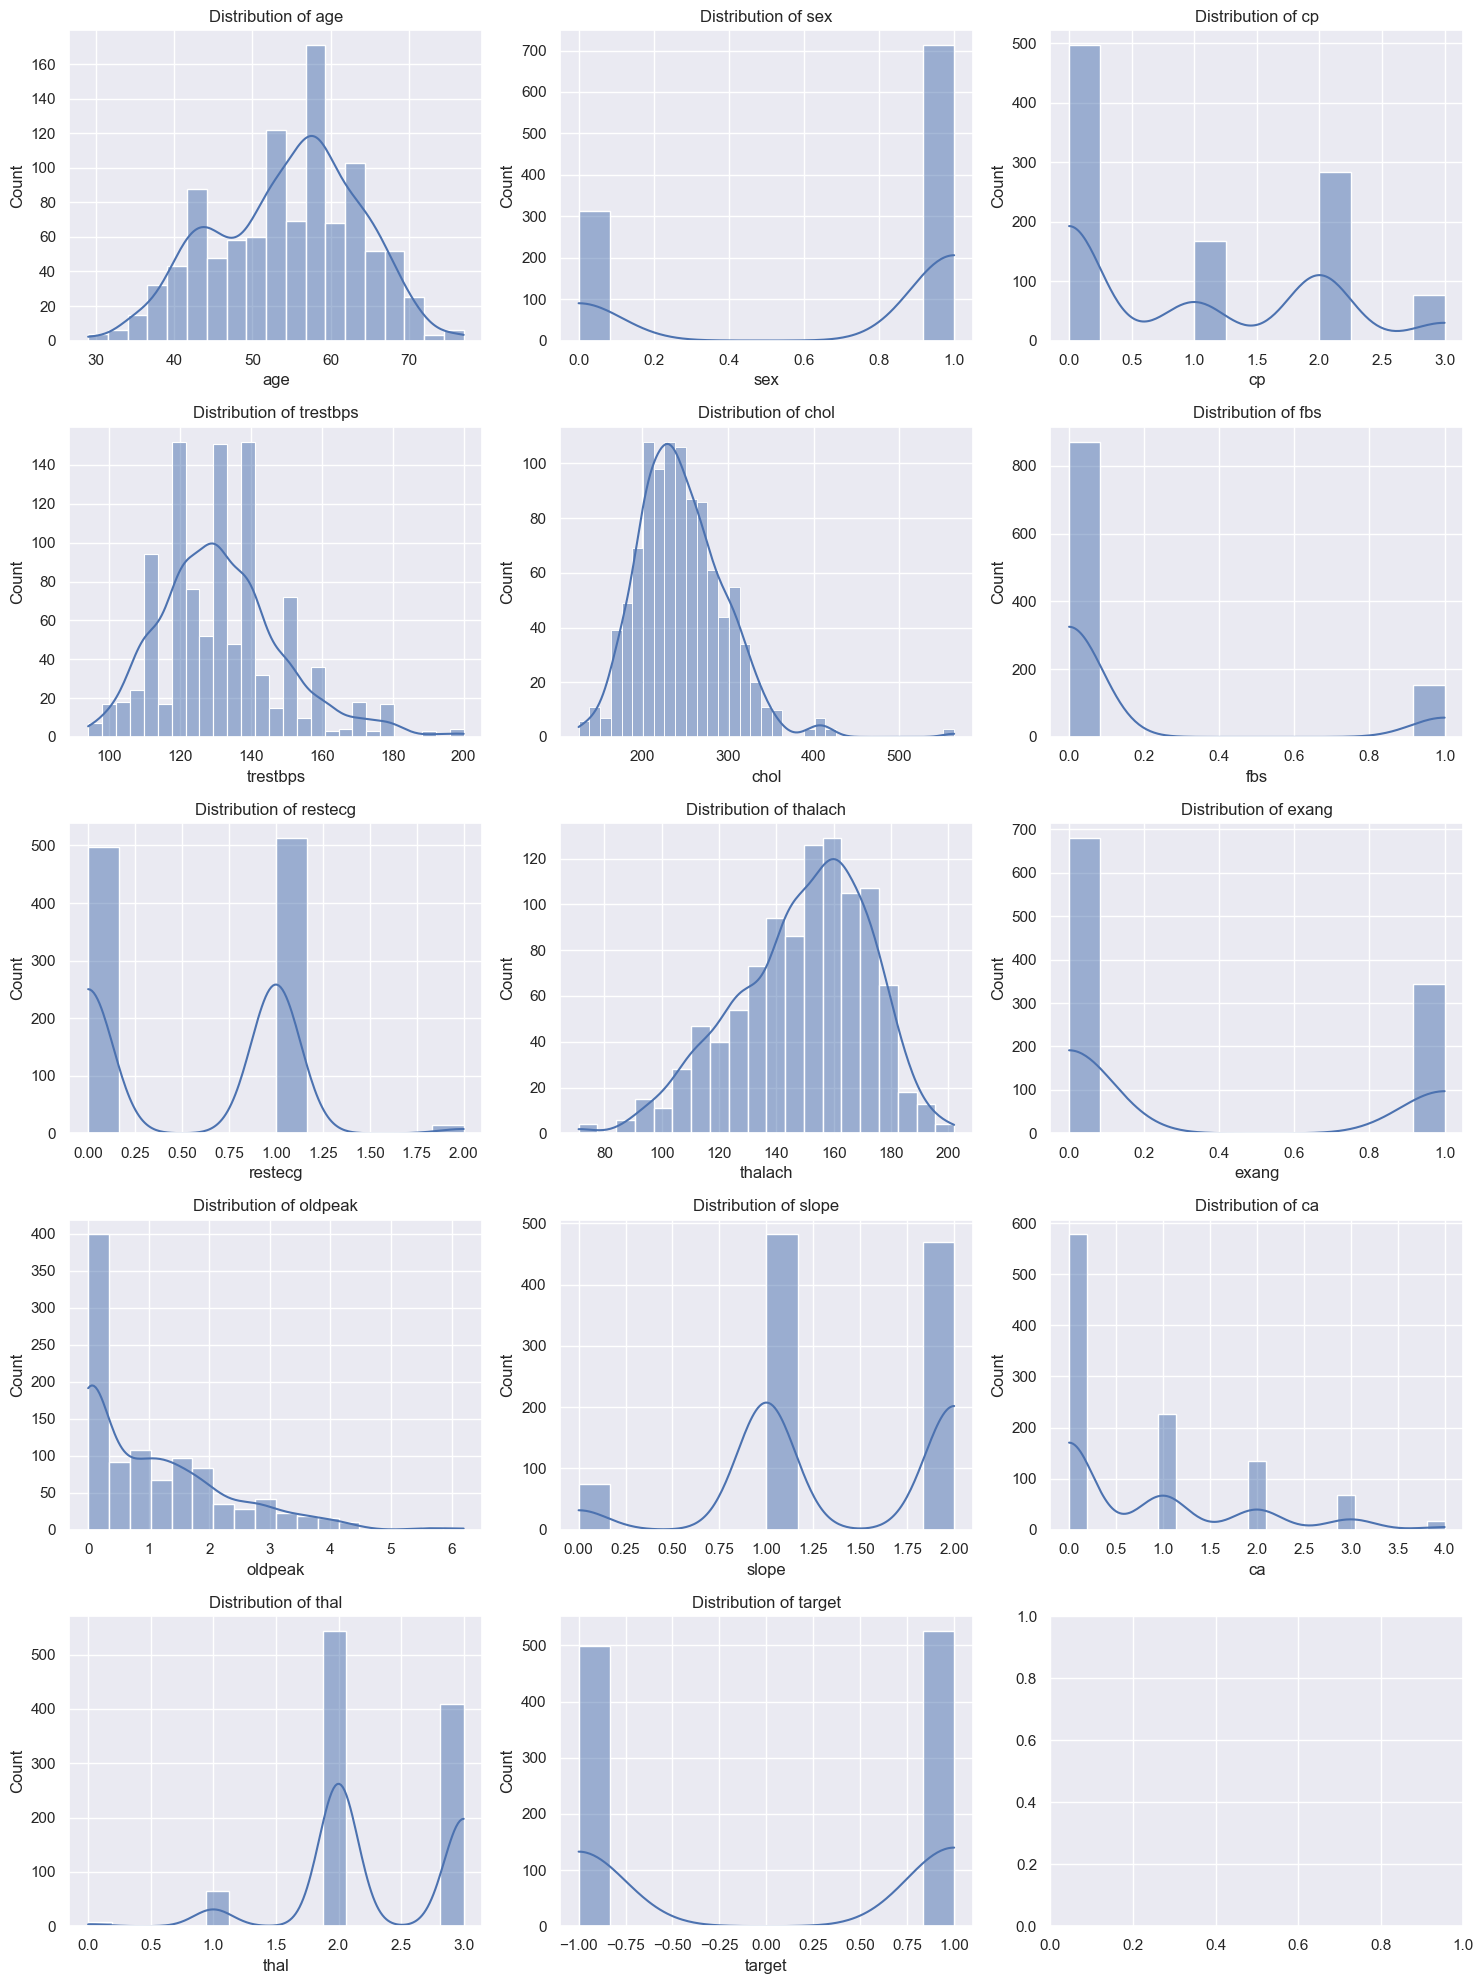

In [7]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(5, 3, figsize=(15, 20))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(data=df, x=column, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

## Analysis of Features

As you have probably noticed, in the dataset that you checked, some features are discrete and the rest are continuous. The following code specifies continuous and discrete features for you. **Note**: In the cells below, `df` is the same dataframe that you loaded in the previous section. You can change its name according to your code.

In [8]:
feature_list = [feature for feature in df.columns]
print("There are",len(feature_list),"features found in the data")

There are 14 features found in the data


In [9]:
#Print Discrete Feature Data
discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print("Discrete features are ",discrete_feature)

#Print Continuous Feature Data
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]
print("Continuous Variables Count: {}".format(len(cont_feature)))
print("Continuous features are ",cont_feature)

Discrete Variables Count: 9
Discrete features are  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous Variables Count: 5
Continuous features are  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# Perceptron

### Stochastic Gradient Descent

We will implement the perceptron algorithm in python 3 and numpy. The perceptron will learn using the stochastic gradient descent algorithm (SGD). Gradient Descent minimizes a function by following the gradients of the cost function.

### Calculating the Error

To calculate the error of a prediction we first need to define the objective function of the perceptron.

#### Hinge Loss Function

To do this, we need to define the loss function, to calculate the prediction error. We will use hinge loss for our perceptron:

$$c(x, y, f(x)) = (1 - y * f(x))_+$$

$c$ is the loss function, $x$ the sample, $y$ is the true label, $f(x)$ the predicted label.

This means the following:
$$
c(x, y, f(x))=
\begin{cases}
    0,& \text{if } y * f(x)\geq 1\\
    1-y*f(x),              & \text{else}
\end{cases}
$$

So consider, if y and f(x) are signed values $(+1,-1)$:

<ul>
    <li>the loss is 0, if $y*f(x)$ are positive, respective both values have the same sign.</li>
    <li>loss is $1-y*f(x)$ if $y*f(x)$ is negative</li>
</ul>

#### Objective Function

As we defined the loss function, we can now define the objective function for the perceptron:

$$l_i(w) = \big(-y_i \langle x_i,w \rangle\big)_+$$

We can write this without the dot product with a sum sign:

$$l_i(w) = (-y_i \sum_{i=1}^n x_iw)_+$$

So the sample $x_i$ is misclassified, if $y_i \langle x_i,w \rangle \leq 0$. The general goal is, to find the global minima of this function, respectively find a parameter $w$, where the error is zero.

#### Derive the Objective Function

To do this we need the gradients of the objective function. The gradient of a function $f$ is the vector of its partial derivatives. The gradient can be calculated by the partially derivative of the objective function.

$$ \nabla l_i(w) = -y_i x_i $$


This means, if we have a misclassified sample $x_i$, respectively $ y_i \langle x_i,w \rangle \leq 0 $, update the weight vector
$w$ by moving it in the direction of the misclassified sample.


$$w = w + y_i x_i$$

With this update rule in mind, we can start writing our perceptron algorithm in python.

## Model


Finally we can code our SGD algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

In [10]:
def perceptron_sgd(X, Y):
    '''
    # TODO: implement the below

    Initialize the weight vector for the perceptron with zeros
    Set the learning rate
    Set the number of epochs
    Iterate n times over the whole dataset.
    Iterate over each sample in the dataset
    Misclassification condition y_i * (x_i . w) <= 0
    Update rule for the weights w = w + y_i * x_i including the learning rate

    '''
    w = np.zeros(X.shape[1])
    best_w = np.zeros(X.shape[1])
    best_acc = 0
    epochs = 2000
    lr = 0.0001
    loss_history = []

    for _ in range(epochs):
        losses = []
        for i in range(len(X)):
            y_pred = np.dot(X[i], w)
            hinge_loss = max(0, 1 - Y[i] * y_pred)
            losses.append(hinge_loss)
            if Y[i] * y_pred <= 0:
                w += lr * Y[i] * X[i]
        
        pred = np.sign(X @ w)
        correct = np.sum(Y == pred)
        total = len(Y)
        acc = correct / total
        if acc > best_acc:
            best_w = w.copy()
            best_acc = acc

        loss_history.append(np.mean(losses))

    return best_w, np.array(loss_history)

### Let the Perceptron learn!

Next we can execute our code to train a classifier model. To see the learning progress of the perceptron, we add a plotting feature to our algorithm, counting the total error in each epoch.

In [11]:
def perceptron_sgd_plot(X, Y):
    '''
    TODO: train perceptron and plot the total loss in each epoch. You may not use the above perceptron_sgd(X, Y) function.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''

    # Your Implementation here

    w, errors = perceptron_sgd(X, Y)

    plt.figure(figsize=(14, 5))
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

In [12]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()

In [13]:
# TODO: Add a bias term -1 into the dataset. This is needed for the SGD to work.

# add a -1 bias term to the end of each row
bias_column = np.ones((X.shape[0], 1)) * -1

# Concatenate the original X with the bias column
X = np.concatenate((X, bias_column), axis=1)

In [14]:
# TODO: Split the data to train and test with a 0.2 ratio
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

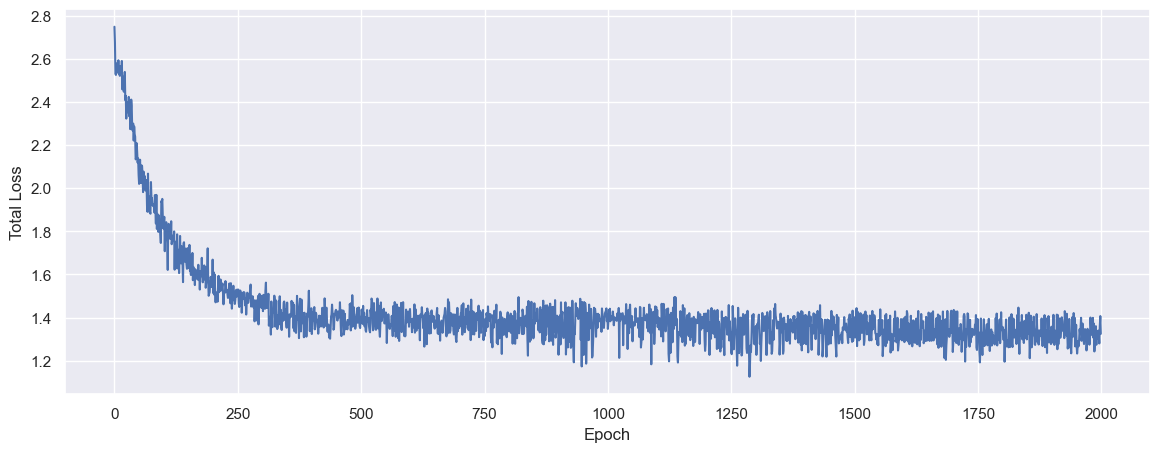

In [15]:
w = perceptron_sgd_plot(X_train,y_train)

### Accuracy


Implement the `accuracy_score` function by considering the predictions and true labels.

In [16]:
def accuracy_score(y_true, y_pred):
    # TODO: Your implementation

    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return (correct/total)*100

Get the accuracy of your model using the function you implemented.

In [17]:
# TODO
predictions = np.sign(X_val @ w)

print(accuracy_score(y_val, predictions))

72.6829268292683


### Confusion Matrix

Implement the `confusion_matrix` function to generate the confusion matrix by receiving the predicted labels, the real labels and the labels themselves.

In [18]:
def confusion_matrix(actual, predicted, labels):
    # TODO: Initialize the confusion matrix
    matrix = np.zeros((len(labels), len(labels)), dtype=int)

    # TODO: Populate the confusion matrix
    for i in range(len(actual)):
        true_label_index = labels.index(actual[i])
        predicted_label_index = labels.index(predicted[i])
        matrix[true_label_index][predicted_label_index] += 1

    return matrix

Implement the following function to plot the confusion matrix obtained from the previous part.

In [19]:
def plot_confusion_matrix(matrix, labels):
    #TODO: plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

Now plot the confusion matrix for your model:

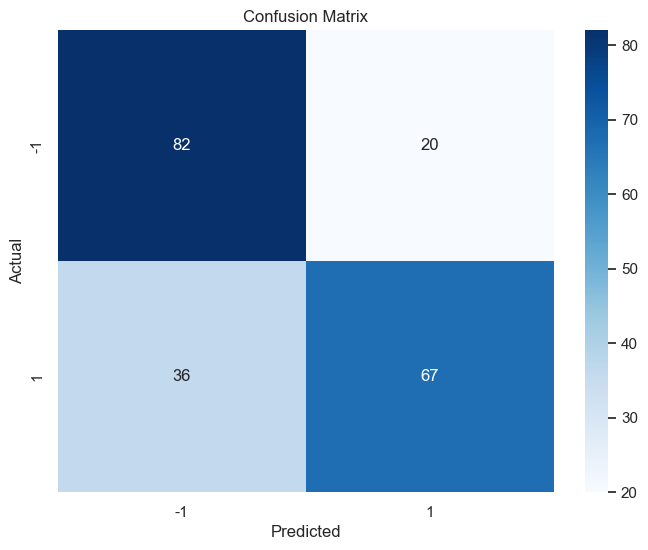

In [20]:
labels = [-1, 1]
cm = confusion_matrix(y_val, predictions, labels)
plot_confusion_matrix(cm, labels)

### F1 Score

Implement the following functions to calculate precision, recall and [F1 score](https://en.wikipedia.org/wiki/F-score) using confusion matrix. Then calculate all three metrics for your model.

In [21]:
def recall_score(cm):
  # TODO: return the recall score
  TP = cm[1][1]
  FP = cm[0][1]
  return TP / (TP + FP)

print(recall_score(cm))

0.7701149425287356


In [22]:
def precision_score(cm):
  # TODO: return the precision score
  TP = cm[1][1]
  FN = cm[1][0]
  return TP / (TP + FN)

print(precision_score(cm))

0.6504854368932039


In [23]:
def f1_score(cm):
  # TODO: return the f1 score
  precesion = precision_score(cm)
  recall = recall_score(cm)
  return 2 * precesion * recall / (precesion + recall)

print(f1_score(cm))

0.7052631578947368


# Naive Bayes

## Model

To predict the target column we want to use a Naive Bayes classifier. In this section, you must implement the functions of the `MixedDataNB` class. Assume continuous features follow a normal distribution. **Hint**: You need to train a Naive Bayes model that implements the likelihood function for categorical and continuous values in two different ways. Search for Gaussian NB and Multinomial NB. **Note**: Please feel free to modify the following class and its functions.

In [24]:
class MixedDataNB:

  def __init__(self):
    self.classes_ = None  # Unique class labels
    self.class_priors_ = None  # Prior probabilities for each class
    self.discrete_features = None  # Indices of discrete features
    self.continuous_features = None  # Indices of continuous features
    self.discrete_feature_counts_ = None  # Counts for each category per feature (categorical)
    self.continuous_feature_means_ = None  # Means for each feature per class (continuous)
    self.continuous_feature_vars_ = None  # Variances for each feature per class (continuous)

  def fit(self, X, y):
    """
    Train the Naive Bayes model for mixed data.

    Args:
        X: A numpy array of shape (n_samples, n_features) representing the features.
        y: A numpy array of shape (n_samples,) representing the target labels.
    """
    self.classes_ = np.unique(y)
    self.class_priors_ = [np.mean(y == c) for c in self.classes_]

    # Separate data for categorical and continuous features
    self.discrete_features = np.where(X.dtype == bool)[0]
    self.continuous_features = np.where(X.dtype != bool)[0]

    # Categorical features - count occurrences per class per feature
    self.discrete_feature_counts_ = np.zeros((len(self.classes_), len(self.discrete_features)))
    for i, sample in enumerate(X):
      for f, feature_value in enumerate(sample[self.discrete_features]):
        class_label = y[i]
        self.discrete_feature_counts_[np.where(self.classes_ == class_label)[0], f] += feature_value

    # Continuous features - calculate mean and variance per class per feature
    self.continuous_feature_means_ = np.zeros((len(self.classes_), len(self.continuous_features)))
    self.continuous_feature_vars_ = np.zeros((len(self.classes_), len(self.continuous_features)))
    for c, class_label in enumerate(self.classes_):
      class_indices = np.where(y == class_label)[0]
      for f in range(len(self.continuous_features)):
        self.continuous_feature_means_[c, f] = np.mean(X[class_indices, self.continuous_features[f]])
        self.continuous_feature_vars_[c, f] = np.var(X[class_indices, self.continuous_features[f]])

  def predict(self, X):
    """
    Predict the class labels for new data samples.

    Args:
        X: A numpy array of shape (n_samples, n_features) representing the new data.

    Returns:
        A numpy array of shape (n_samples,) containing the predicted class labels.
    """
    # Probability calculations for each class
    posteriors = []
    for class_label in self.classes_:
        class_index = np.where(self.classes_ == class_label)[0][0]  # Get the index of the class label
        proba = self.class_priors_[class_index]

        # Categorical features - calculate probability using counts and Laplace smoothing
        for f in range(len(self.discrete_features)):
            feature_value = X[:, self.discrete_features[f]]
            feature_counts = self.discrete_feature_counts_[class_index, f]
            proba *= (feature_counts[feature_value.astype(int)] + 1) / (np.sum(feature_counts) + len(self.classes_))

        # Continuous features - calculate probability using Gaussian distribution
        for f in range(len(self.continuous_features)):
            feature_value = X[:, self.continuous_features[f]]
            mean = self.continuous_feature_means_[class_index, f]
            var = self.continuous_feature_vars_[class_index, f] + 1e-10  # Add small value to avoid division by zero
            proba *= 1 / np.sqrt(2 * np.pi * var) * np.exp(-(feature_value - mean)**2 / (2 * var))

        posteriors.append(proba)

    # Predict the class with the highest posterior probability
    return self.classes_[np.argmax(np.array(posteriors), axis=0)]

## Train and Validation


### Data splitting

Split the training and validation data. Separate 20% of the data for validation.

In [25]:
# TODO
# Here we use the already splitted data from the previous section

### Model training

In [26]:
# TODO
nb_classifier = MixedDataNB()
nb_classifier.fit(X_train, y_train)

C:\Users\Dan\AppData\Local\Temp\ipykernel_12528\2962787202.py:24: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  self.discrete_features = np.where(X.dtype == bool)[0]
C:\Users\Dan\AppData\Local\Temp\ipykernel_12528\2962787202.py:25: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  self.continuous_features = np.where(X.dtype != bool)[0]


### Make predictions

In [27]:
# TODO
predictions = nb_classifier.predict(X_val)

### Accuracy

Get the accuracy of your model using the function you implemented.

In [28]:
print(accuracy_score(y_val, predictions))

65.3658536585366


### Confusion Matrix

Now, using the functions you wrote, plot the confusion matrix for the model you trained.

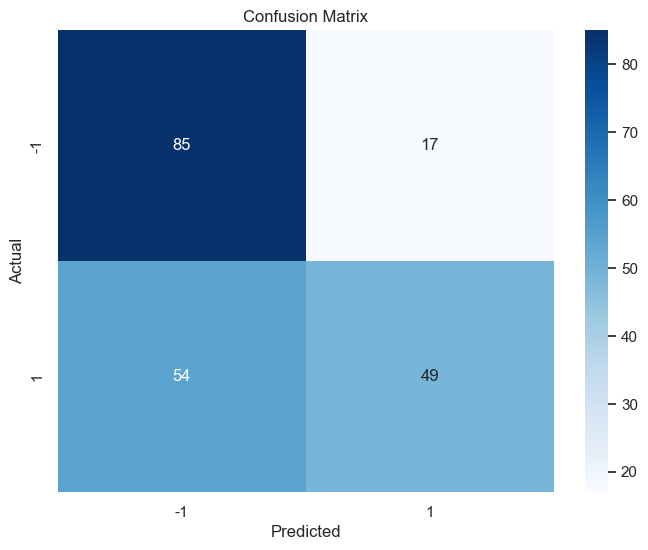

In [29]:
# TODO
cm = confusion_matrix(y_val, predictions, labels)
plot_confusion_matrix(cm, labels)

### F1 Score

Using your implemented functions in the previous section, calculate precision, recall and F1 score using confusion matrix. Then calculate all three metrics for your model.

In [30]:
print(recall_score(cm))

0.7424242424242424


In [31]:
print(precision_score(cm))

0.47572815533980584


In [32]:
print(f1_score(cm))

0.5798816568047338


### Heatmap

By ploting the heatmap obtained for chol and oldpeak features from your model, compare the usefulness of these two features.


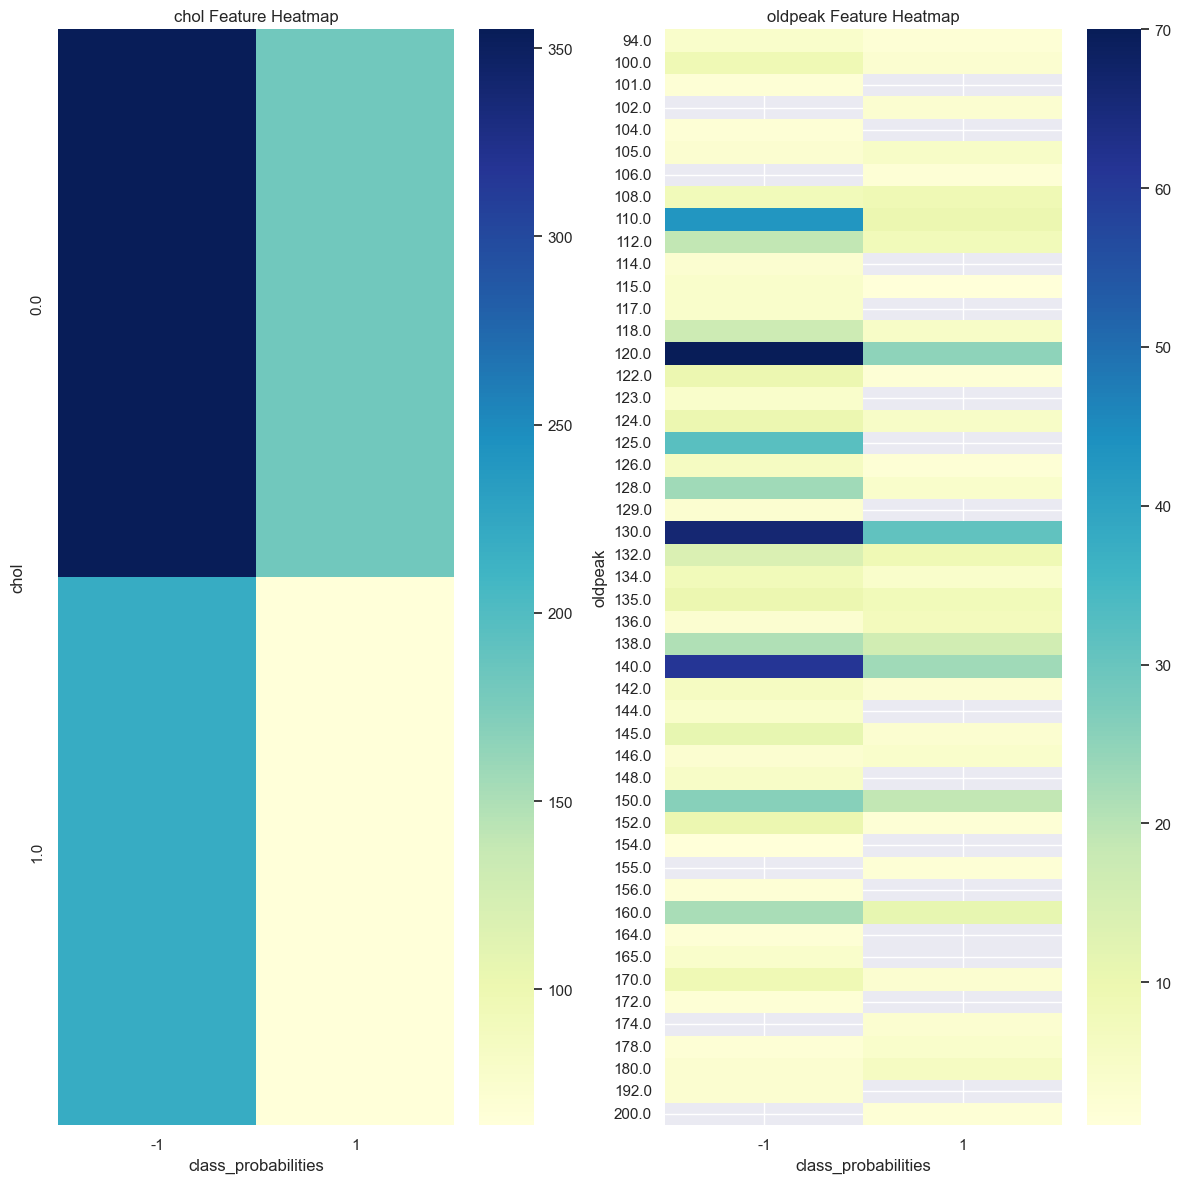

In [33]:
# TODO
class_probabilities = nb_classifier.predict(X_train)

data = {
    'chol': X_train[:, 4],
    'oldpeak': X_train[:, 9],
    'class_probabilities': class_probabilities
}
df = pd.DataFrame(data)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
sns.heatmap(df.pivot_table(index='chol', columns='class_probabilities', aggfunc='size'), cmap='YlGnBu')
plt.title('chol Feature Heatmap')

plt.subplot(1, 2, 2)
sns.heatmap(df.pivot_table(index='oldpeak', columns='class_probabilities', aggfunc='size'), cmap='YlGnBu')
plt.title('oldpeak Feature Heatmap')

plt.tight_layout()
plt.show()

Train your model once by removing the chol feature and once by removing the oldpeak feature and calculate its accuracy. Compare the obtained results with the previous part.

Remove Chol and test model

Acc: 73.17073170731707
Precesion: 0.6504854368932039
Recall: 0.7790697674418605
F1: 0.708994708994709


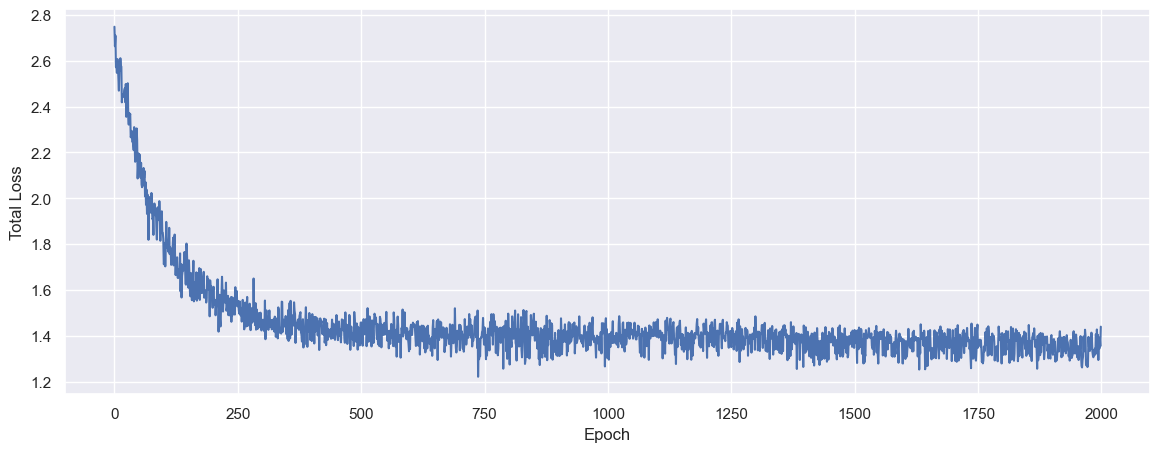

In [34]:
# TODO
w = perceptron_sgd_plot(np.delete(X_train, 4, axis=1),y_train)
predictions = np.sign(np.delete(X_val, 4, axis=1) @ w)
print("Acc:", accuracy_score(y_val, predictions))
cm = confusion_matrix(y_val, predictions, labels)
print("Precesion:", precision_score(cm))
print("Recall:", recall_score(cm))
print("F1:", f1_score(cm))

In [35]:
nb_classifier = MixedDataNB()
nb_classifier.fit(np.delete(X_train, 4, axis=1), y_train)
predictions = nb_classifier.predict(np.delete(X_val, 4, axis=1))
print("Acc:", accuracy_score(y_val, predictions))
cm = confusion_matrix(y_val, predictions, labels)
print("Precesion:", precision_score(cm))
print("Recall:", recall_score(cm))
print("F1:", f1_score(cm))

Acc: 65.3658536585366
Precesion: 0.47572815533980584
Recall: 0.7424242424242424
F1: 0.5798816568047338


C:\Users\Dan\AppData\Local\Temp\ipykernel_12528\2962787202.py:24: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  self.discrete_features = np.where(X.dtype == bool)[0]
C:\Users\Dan\AppData\Local\Temp\ipykernel_12528\2962787202.py:25: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  self.continuous_features = np.where(X.dtype != bool)[0]


Remove oldpeak and test model

Acc: 76.09756097560975
Precesion: 0.7184466019417476
Recall: 0.7872340425531915
F1: 0.7512690355329948


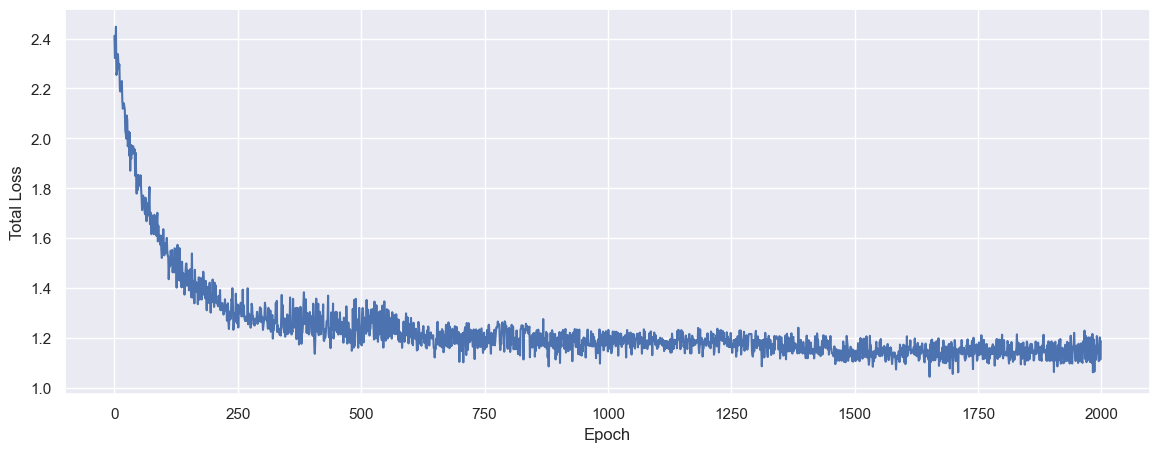

In [36]:
# TODO
w = perceptron_sgd_plot(np.delete(X_train, 9, axis=1),y_train)
predictions = np.sign(np.delete(X_val, 9, axis=1) @ w)
print("Acc:", accuracy_score(y_val, predictions))
cm = confusion_matrix(y_val, predictions, labels)
print("Precesion:", precision_score(cm))
print("Recall:", recall_score(cm))
print("F1:", f1_score(cm))

In [37]:
nb_classifier = MixedDataNB()
nb_classifier.fit(np.delete(X_train, 9, axis=1), y_train)
predictions = nb_classifier.predict(np.delete(X_val, 9, axis=1))
print("Acc:", accuracy_score(y_val, predictions))
cm = confusion_matrix(y_val, predictions, labels)
print("Precesion:", precision_score(cm))
print("Recall:", recall_score(cm))
print("F1:", f1_score(cm))

Acc: 65.3658536585366
Precesion: 0.47572815533980584
Recall: 0.7424242424242424
F1: 0.5798816568047338


C:\Users\Dan\AppData\Local\Temp\ipykernel_12528\2962787202.py:24: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  self.discrete_features = np.where(X.dtype == bool)[0]
C:\Users\Dan\AppData\Local\Temp\ipykernel_12528\2962787202.py:25: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  self.continuous_features = np.where(X.dtype != bool)[0]


Comparison

### Answer:
We can see that deleting both features led to an improvement in the performance of perceptron, with the last one having the best influence. However the naive bayes model is not affected at all, which is surprising.

# Comparison

Which model did better: the perceptron or the Naive Bayes model? What factors do you think influenced the difference in their performance?

### Answer:
As we can see, the perceptron performed better than the naive bayes model. Perceptrons are capable of learning more complex decision boundaries compared to Naive Bayes. Perceptrons can work well with high-dimensional or non-linear feature spaces, especially when features are represented in a way that captures non-linear relationships. In contrast, Naive Bayes assumes independence between features, which may not hold true for certain datasets with complex interdependencies between features. So for this dataset, we expected the perceptron to perform better than the naive bayes model.

# Imbalanced Data

By using the model you designed and the functions you implemented, train your model on the three imbalanced data sets provided to you and calculate accuracy, recall, precision, and F1 score metrics for it each time. The confusion matrix should also be plotted each time. Finally, analyze based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets. **Note:** In order to prevent code duplication, you are free to define functions and only use them with different datasets.

## First dataset

### Load data

In [38]:
df = pd.read_csv("./Imbalanced_Datasets/1.csv")

### Find the distribution


Find the number of samples from each target label.

In [39]:
# TODO
df['target'].value_counts()

target
0    499
1    226
Name: count, dtype: int64

In [40]:
df['target'] = df['target'].replace(0, -1)

### Split data

In [41]:
# TODO
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
bias_column = np.ones((X.shape[0], 1)) * -1
X = np.concatenate((X, bias_column), axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Train model and make predictions

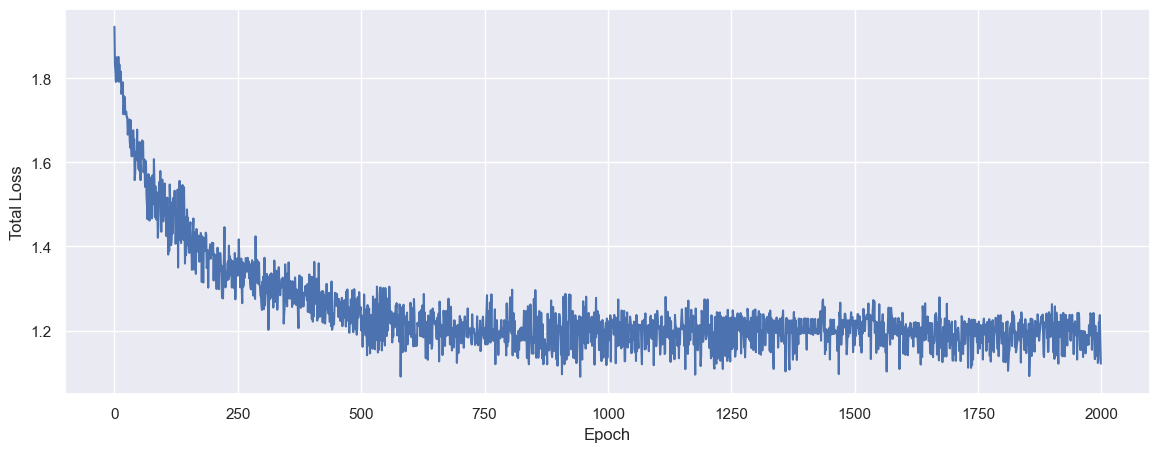

In [42]:
# TODO
w = perceptron_sgd_plot(np.delete(X_train, 9, axis=1),y_train)
predictions = np.sign(np.delete(X_val, 9, axis=1) @ w)

### Plot confusion matrix

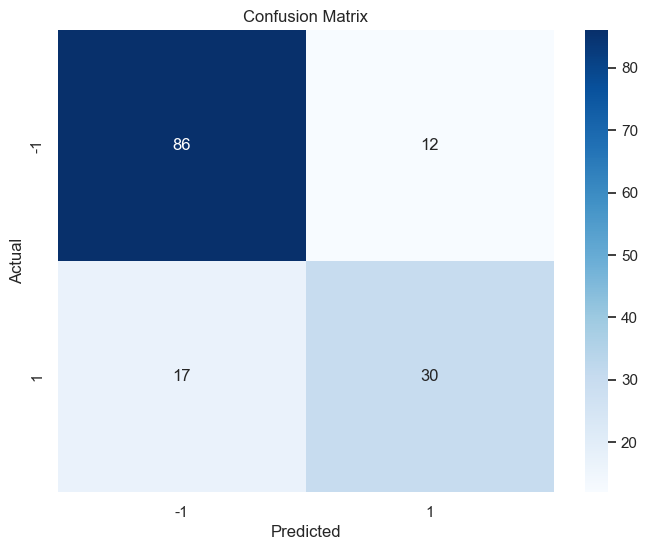

In [43]:
# TODO
cm = confusion_matrix(y_val, predictions, labels)
plot_confusion_matrix(cm, labels)

### Calculate metrics

In [44]:
# TODO
print("Acc:", accuracy_score(y_val, predictions))
print("Precesion:", precision_score(cm))
print("Recall:", recall_score(cm))
print("F1:", f1_score(cm))

Acc: 80.0
Precesion: 0.6382978723404256
Recall: 0.7142857142857143
F1: 0.6741573033707866


## Second dataset

### Load data

In [45]:
df = pd.read_csv("./Imbalanced_Datasets/2.csv")
df['target'] = df['target'].replace(0, -1)

### Find the distribution


Find the number of samples from each target label.

In [46]:
# TODO
df['target'].value_counts()

target
-1    499
 1    126
Name: count, dtype: int64

### Split data

In [47]:
# TODO
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
bias_column = np.ones((X.shape[0], 1)) * -1
X = np.concatenate((X, bias_column), axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Train model and make predictions

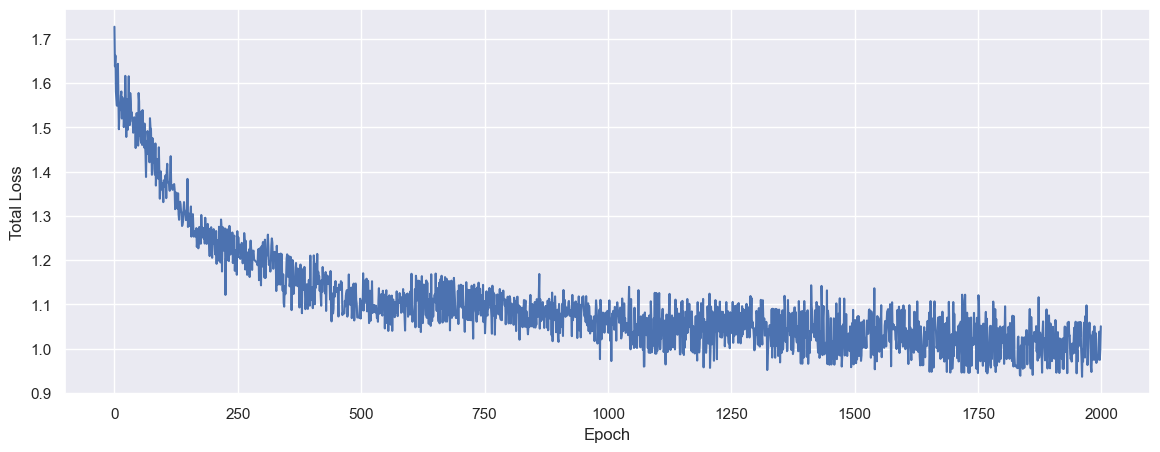

In [48]:
# TODO
w = perceptron_sgd_plot(np.delete(X_train, 9, axis=1),y_train)
predictions = np.sign(np.delete(X_val, 9, axis=1) @ w)

### Plot confusion matrix

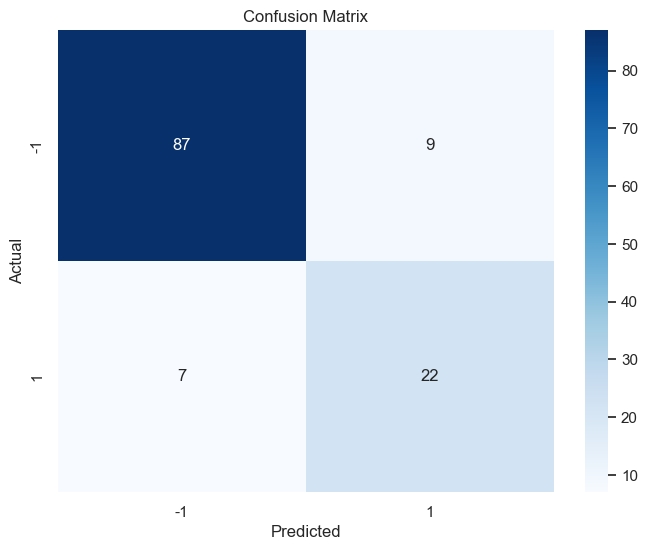

In [49]:
# TODO
cm = confusion_matrix(y_val, predictions, labels)
plot_confusion_matrix(cm, labels)

### Calculate metrics

In [50]:
# TODO
print("Acc:", accuracy_score(y_val, predictions))
print("Precesion:", precision_score(cm))
print("Recall:", recall_score(cm))
print("F1:", f1_score(cm))

Acc: 87.2
Precesion: 0.7586206896551724
Recall: 0.7096774193548387
F1: 0.7333333333333333


## Third dataset

### Load data

In [51]:
df = pd.read_csv("./Imbalanced_Datasets/3.csv")
df['target'] = df['target'].replace(0, -1)

### Find the distribution


Find the number of samples from each target label.

In [52]:
# TODO
df['target'].value_counts()

target
-1    499
 1     26
Name: count, dtype: int64

### Split data

In [53]:
# TODO
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
bias_column = np.ones((X.shape[0], 1)) * -1
X = np.concatenate((X, bias_column), axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Train model and make predictions

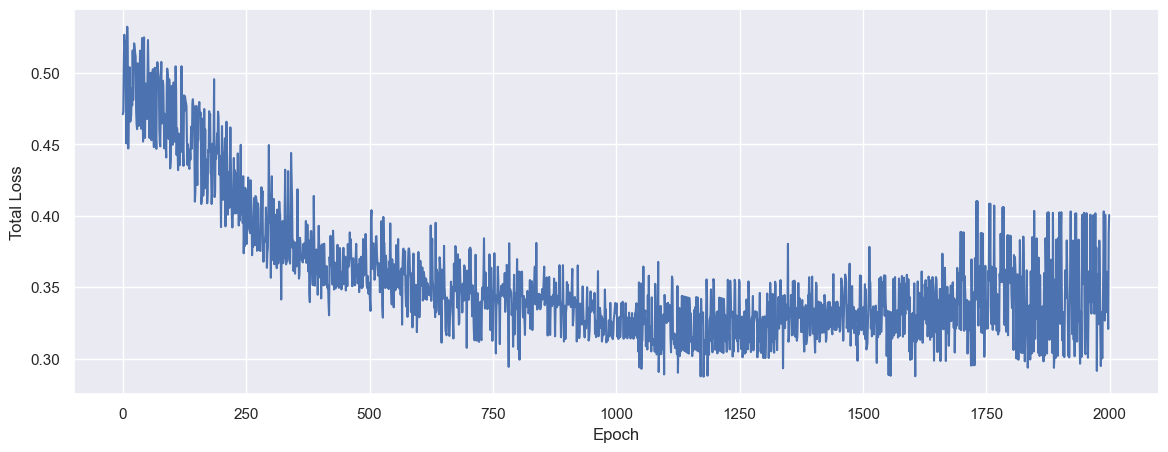

In [54]:
# TODO
w = perceptron_sgd_plot(np.delete(X_train, 9, axis=1),y_train)
predictions = np.sign(np.delete(X_val, 9, axis=1) @ w)

### Plot confusion matrix

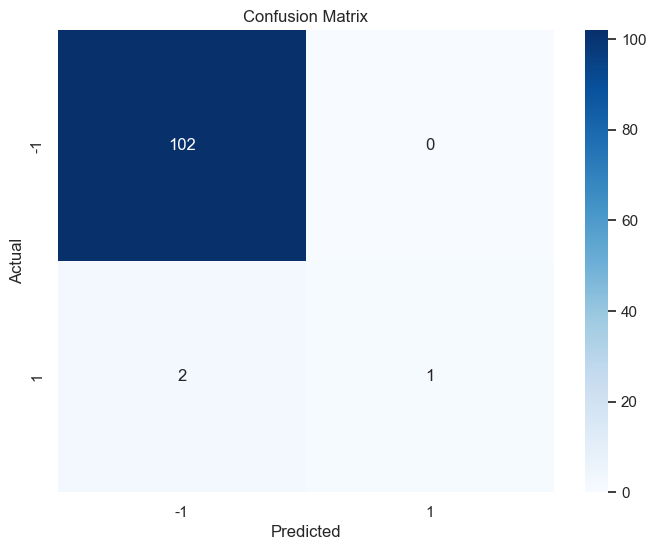

In [55]:
# TODO
cm = confusion_matrix(y_val, predictions, labels)
plot_confusion_matrix(cm, labels)

### Calculate metrics

In [56]:
# TODO
print("Acc:", accuracy_score(y_val, predictions))
print("Precesion:", precision_score(cm))
print("Recall:", recall_score(cm))
print("F1:", f1_score(cm))

Acc: 98.09523809523809
Precesion: 0.3333333333333333
Recall: 1.0
F1: 0.5


## Comparison

Based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets?

**Answer:**
Obviously the F1 score is the best metric in this situations because it will cover the small subgroups of dataset and is more general than accuracy.